# Exploratory Data Analysis

In [16]:
import pandas as pd
pd.set_option('display.max_rows', 200)
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from fuzzywuzzy import fuzz, process

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import preprocessing  # Own preprocessing function
import importlib
#importlib.reload(preprocessing)


# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

In [270]:
importlib.reload(preprocessing)

<module 'preprocessing' from '/Users/stb/Documents/GitHub/covid/preprocessing.py'>

## Import Data

### df

In [326]:
df = preprocessing.get_data(date_="03-15-2020", time_series=True, population=True)

In [49]:
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Country,Active
0,Afghanistan,2020-01-22,0,0,0,Afghanistan,0
55,Albania,2020-01-22,0,0,0,Albania,0
110,Algeria,2020-01-22,0,0,0,Algeria,0
165,Andorra,2020-01-22,0,0,0,Andorra,0
220,Antigua and Barbuda,2020-01-22,0,0,0,Antigua and Barbuda,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8580 entries, 0 to 8571
Data columns (total 7 columns):
Country/Region    8580 non-null object
Date              8580 non-null datetime64[ns]
Confirmed         8580 non-null int64
Deaths            8580 non-null int64
Recovered         8580 non-null int64
Country           8580 non-null object
Active            8580 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 536.2+ KB


In [51]:
df.groupby("Country/Region").sum()

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Afghanistan,95,0,1,94
Albania,211,6,0,205
Algeria,340,14,52,274
Andorra,16,0,4,12
Antigua and Barbuda,4,0,0,4
Argentina,258,13,3,242
Armenia,119,0,0,119
Aruba,8,0,0,8
Australia,2504,38,503,1963


### DAX30

In [ ]:
ind_list = ['^GDAXI', '^SPG1200']

In [319]:
index_list = preprocessing.get_index(indexes=['^GDAXI'])

In [320]:
dax = index_list[0]

In [321]:
dax.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02,13233.71,13425.03,13225.16,13385.93,75341400,0,0
1,2020-01-03,13266.39,13282.74,13120.72,13219.14,80793400,0,0
2,2020-01-06,13085.49,13143.11,12948.17,13126.99,71778600,0,0
3,2020-01-07,13199.59,13283.88,13166.40,13226.83,78282300,0,0
4,2020-01-08,13140.49,13334.04,13106.27,13320.18,88178800,0,0


In [324]:
dax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
Date            56 non-null datetime64[ns]
Open            56 non-null float64
High            56 non-null float64
Low             56 non-null float64
Close           56 non-null float64
Volume          56 non-null int64
Dividends       56 non-null int64
Stock Splits    56 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 3.6 KB


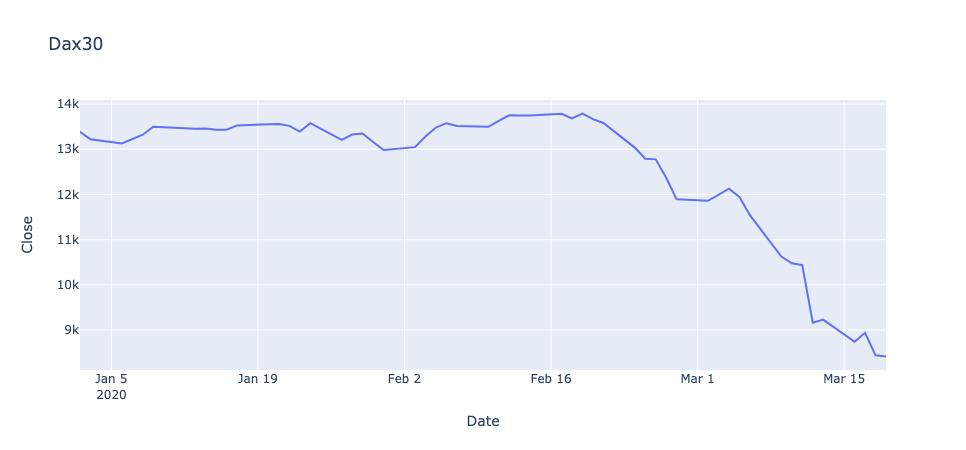

In [322]:
fig = px.line(dax, x='Date', y='Close',
              title='Dax30')
fig.show()

## Analysis

In [77]:
import seaborn as sns
sns.set()

### World Cases

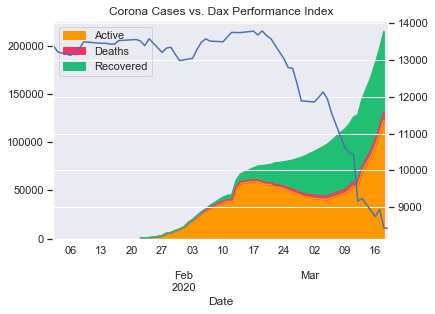

In [327]:
ax = df.groupby("Date", as_index=False)[['Active', 'Deaths', 'Recovered']].sum().plot.area(x='Date', color=[act, dth, rec], grid=False)

dax.plot(x='Date', y='Close', secondary_y=True, legend=False, ax=ax, grid=False)

plt.title("Corona Cases vs. Dax Performance Index")

plt.show()

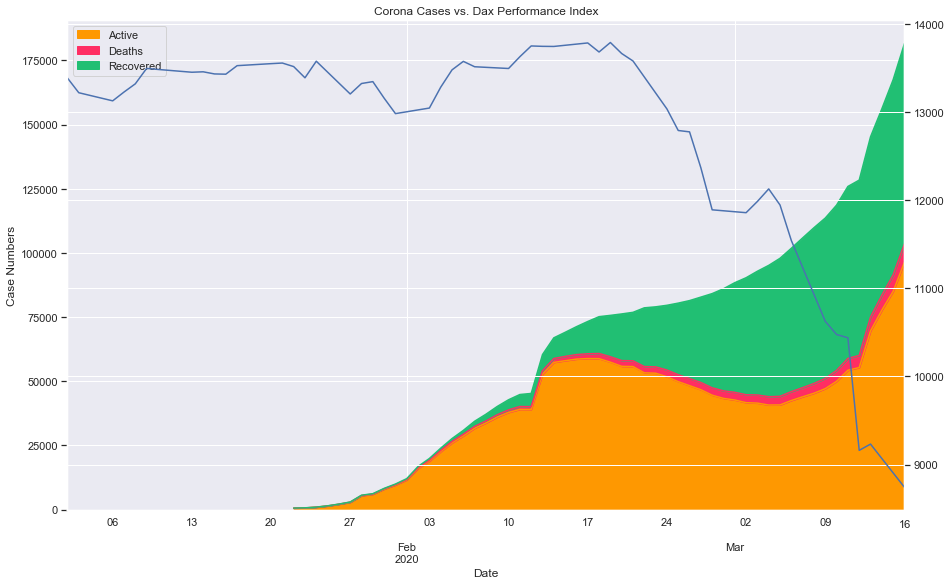

In [97]:
fig = plt.figure(figsize=(15,9))

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

df.groupby("Date", as_index=False)[['Active', 'Deaths', 'Recovered']].sum().plot.area(x='Date', color=[act, dth, rec], ax=ax1)

dax.plot(x='Date', y='Adj Close', secondary_y=True, ax=ax2, legend=False)

ax2.set_ylabel('Dax 30')
ax1.set_ylabel('Case Numbers')


plt.title("Corona Cases vs. Dax Performance Index")
plt.show()

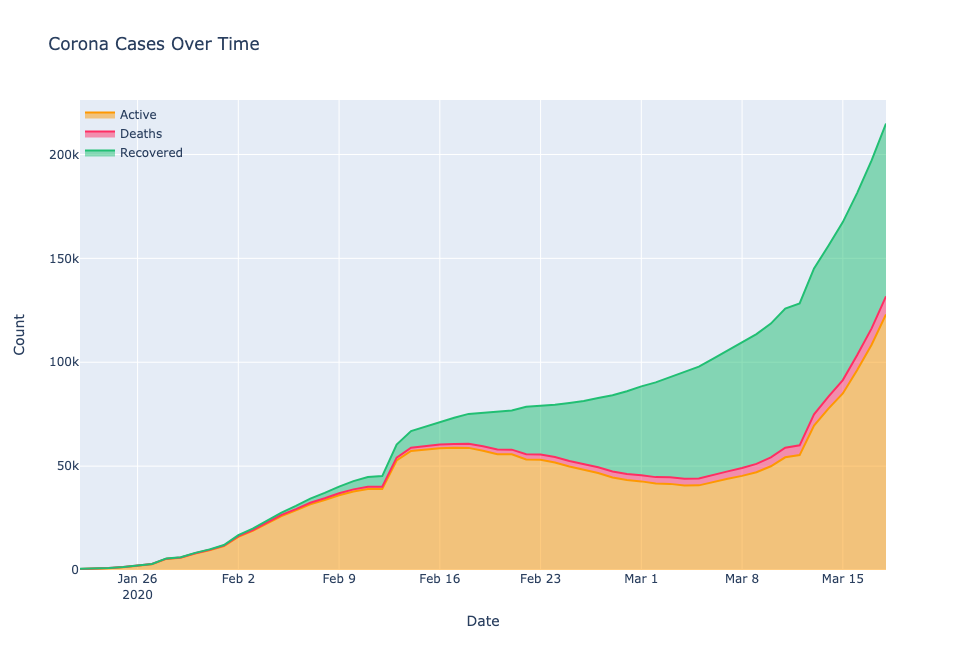

In [336]:
temp = df.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Active', 'Deaths', 'Recovered'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case',
             title='Corona Cases Over Time', color_discrete_sequence = [act, dth, rec],
             height=650, range_x=['01-01-2020', '17-03-2020'])

#fig.add_scatter(x=dax.Date, y=dax.Close)

fig.update_layout(
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    legend_title=''
)

fig.show()

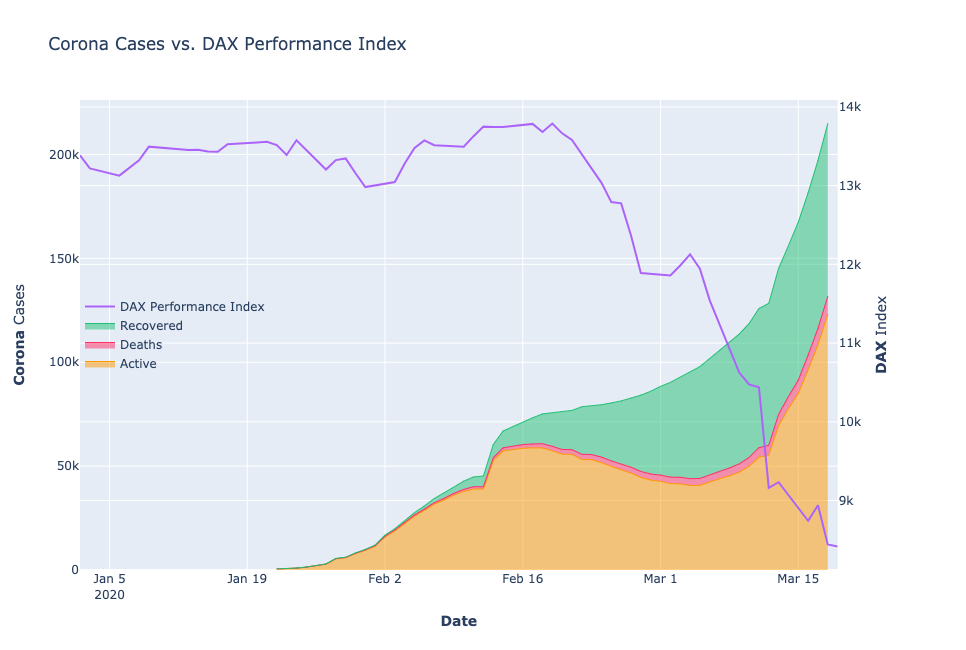

In [329]:
#fig = go.Figure()

grouped = df.groupby("Date", as_index=False).sum()
germany = df[df.Country=='Germany']

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=grouped.Date, y=grouped.Active,
    hoverinfo='x+y',
    mode='lines',
    name='Active',
    line=dict(width=1, color=act),
    stackgroup='one', # define stack group
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=grouped.Date, y=grouped.Deaths,
    hoverinfo='x+y',
    mode='lines',
    name='Deaths',
    line=dict(width=1, color=dth),
    stackgroup='one'
), secondary_y=False,)

fig.add_trace(go.Scatter(
    x=grouped.Date, y=grouped.Recovered,
    hoverinfo='x+y',
    mode='lines',
    name='Recovered',
    line=dict(width=1, color=rec),
    stackgroup='one'), secondary_y=False,)

fig.add_scatter(x=dax.Date, y=dax.Close, secondary_y=True, name='DAX Performance Index')

#fig.add_scatter(x=germany.Date, y=germany.Confirmed, secondary_y=False, name='Confirmed Cases in <b>Germany</b>')


fig.update_layout(height=650)

fig.update_layout(
    legend=dict(
        x=0,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    legend_title=''
)

# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Add figure title
fig.update_layout(
    title_text="Corona Cases vs. DAX Performance Index"
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>DAX</b> Index", secondary_y=True)
fig.update_yaxes(title_text="<b>Corona</b> Cases", secondary_y=False)


fig.show()
fig.write_html("data/corona_vs_dax.html")

### DAX vs Germany Cases

In [298]:
germany.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Country,Active
2912,Germany,2020-01-22,0,0,0,Germany,0
2913,Germany,2020-01-23,0,0,0,Germany,0
2914,Germany,2020-01-24,0,0,0,Germany,0
2915,Germany,2020-01-25,0,0,0,Germany,0
2916,Germany,2020-01-26,0,0,0,Germany,0


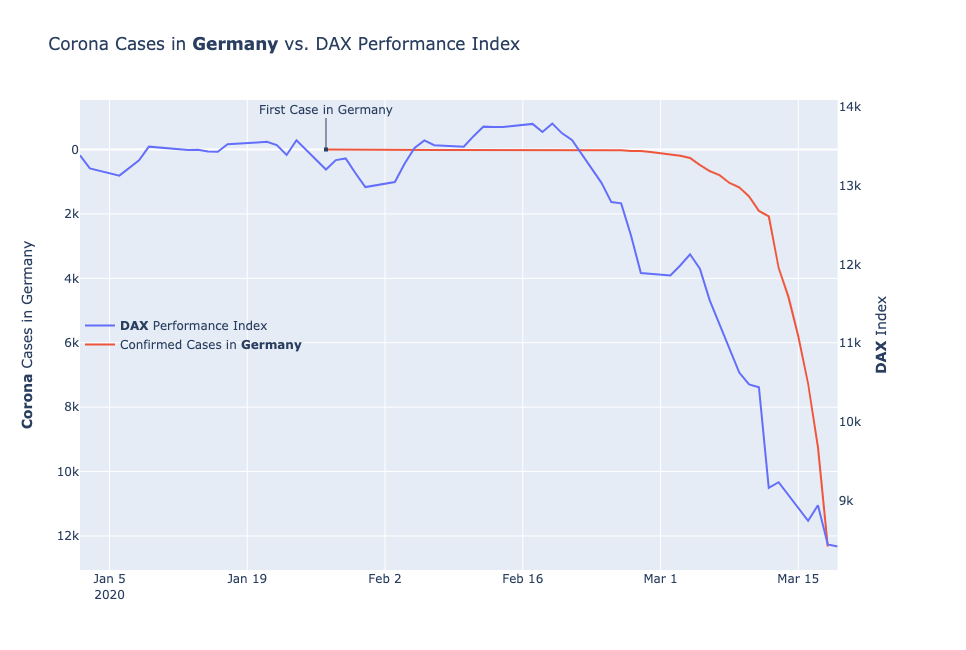

In [330]:
#fig = go.Figure()

#grouped = df.groupby("Date", as_index=False).sum()
germany = df[df.Country=='Germany']
germany = germany[germany.Confirmed > 0]


world = df.groupby("Date", as_index=False).Confirmed.sum()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# fig.add_trace(go.Scatter(
#     x=grouped.Date, y=grouped.Active,
#     hoverinfo='x+y',
#     mode='lines',
#     name='Active',
#     line=dict(width=1, color=act),
#     stackgroup='one', # define stack group
# ),secondary_y=False,)

# fig.add_trace(go.Scatter(
#     x=grouped.Date, y=grouped.Deaths,
#     hoverinfo='x+y',
#     mode='lines',
#     name='Deaths',
#     line=dict(width=1, color=dth),
#     stackgroup='one'
# ), secondary_y=False,)

# fig.add_trace(go.Scatter(
#     x=grouped.Date, y=grouped.Recovered,
#     hoverinfo='x+y',
#     mode='lines',
#     name='Recovered',
#     line=dict(width=1, color=rec),
#     stackgroup='one'), secondary_y=False,)

fig.add_scatter(x=dax.Date, y=dax.Close, secondary_y=True, name='<b>DAX</b> Performance Index')

fig.add_scatter(x=germany.Date, y=germany.Confirmed, secondary_y=False, name='Confirmed Cases in <b>Germany</b>')

#fig.add_scatter(x=world.Date, y=world.Confirmed, secondary_y=False, name='Confirmed Cases <b>Worldwide</b>')


fig.update_layout(height=650)

fig.update_layout(
    legend=dict(
        x=0,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    legend_title=''
)

# Set x-axis title
#fig.update_xaxes(title_text="<b>Date</b>")

# Add figure title
fig.update_layout(
    # title_text="Corona Cases in vs. Performance Indexes",
    title_text="Corona Cases in <b>Germany</b> vs. DAX Performance Index",
    annotations=[
        dict(
            x=germany.Date.iloc[0],
            y=germany.Confirmed.iloc[0],
            xref="x",
            yref="y",
            text="First Case\nin Germany",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>DAX</b> Index", secondary_y=True, showgrid=False)
fig.update_yaxes(title_text="<b>Corona</b> Cases in Germany", secondary_y=False)

fig.update_yaxes(autorange="reversed", secondary_y=False)

fig.show()
fig.write_html("data/corona_vs_dax.html")

In [331]:
germany

,Country/Region,Date,Confirmed,Deaths,Recovered,Country,Active,Population,ISO3_Code,Income,Confirmed_per_Cap,Deaths_per_Cap,Recovered_per_Cap,Active_per_Cap
813,Germany,2020-01-27,1,0,0,Germany,1,83.783945,DEU,High-income countries,0.011935,0.000000,0.000000,0.011935
965,Germany,2020-01-28,4,0,0,Germany,4,83.783945,DEU,High-income countries,0.047742,0.000000,0.000000,0.047742
1117,Germany,2020-01-29,4,0,0,Germany,4,83.783945,DEU,High-income countries,0.047742,0.000000,0.000000,0.047742
1269,Germany,2020-01-30,4,0,0,Germany,4,83.783945,DEU,High-income countries,0.047742,0.000000,0.000000,0.047742
1421,Germany,2020-01-31,5,0,0,Germany,5,83.783945,DEU,High-income countries,0.059677,0.000000,0.000000,0.059677
1573,Germany,2020-02-01,8,0,0,Germany,8,83.783945,DEU,High-income countries,0.095484,0.000000,0.000000,0.095484
1725,Germany,2020-02-02,10,0,0,Germany,10,83.783945,DEU,High-income countries,0.119355,0.000000,0.000000,0.119355
1877,Germany,2020-02-03,12,0,0,Germany,12,83.783945,DEU,High-income countries,0.143226,0.000000,0.000000,0.143226
2029,Germany,2020-02-04,12,0,0,Germany,12,83.783945,DEU,High-income countries,0.143226,0.000000,0.000000,0.143226
2181,Germany,2020-02-05,12,0,0,Germany,12,83.783945,DEU,High-income countries,0.143226,0.000000,0.000000,0.143226


In [316]:
germany.to_excel('data/peter/germany.xlsx')
dax.to_excel('data/peter/dax.xlsx')

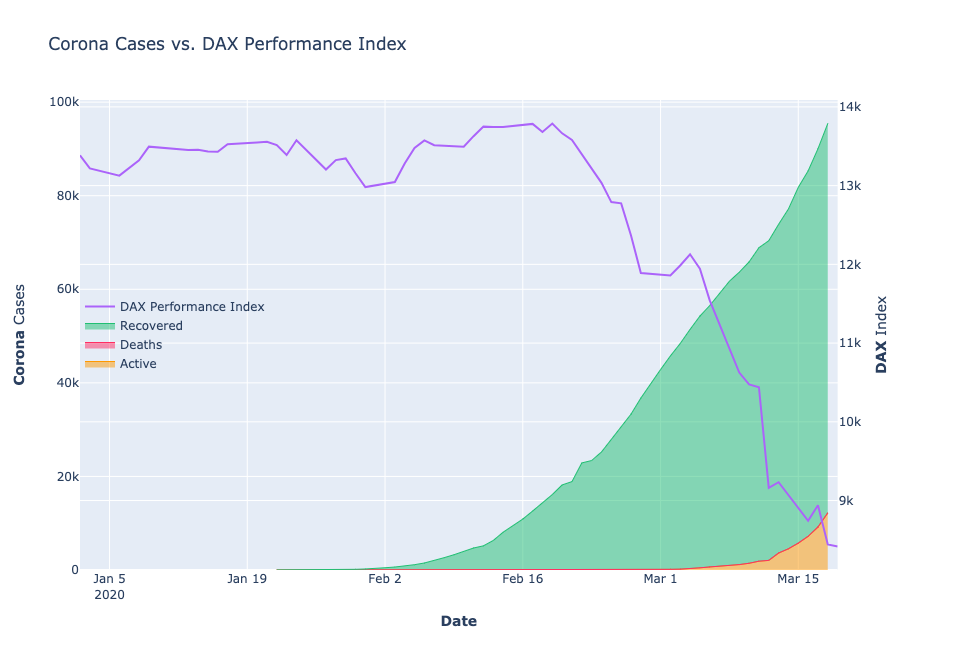

In [332]:
#fig = go.Figure()

grouped = df.groupby("Date", as_index=False).sum()
germany = df[df.Country=='Germany']

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=germany.Date, y=germany.Active,
    hoverinfo='x+y',
    mode='lines',
    name='Active',
    line=dict(width=1, color=act),
    stackgroup='one', # define stack group
),secondary_y=False,)

fig.add_trace(go.Scatter(
    x=germany.Date, y=germany.Deaths,
    hoverinfo='x+y',
    mode='lines',
    name='Deaths',
    line=dict(width=1, color=dth),
    stackgroup='one'
), secondary_y=False,)

fig.add_trace(go.Scatter(
    x=germany.Date, y=grouped.Recovered,
    hoverinfo='x+y',
    mode='lines',
    name='Recovered',
    line=dict(width=1, color=rec),
    stackgroup='one'), secondary_y=False,)

fig.add_scatter(x=dax.Date, y=dax.Close, secondary_y=True, name='DAX Performance Index')


fig.update_layout(height=650)

fig.update_layout(
    legend=dict(
        x=0,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    legend_title=''
)

# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Add figure title
fig.update_layout(
    title_text="Corona Cases vs. DAX Performance Index"
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>DAX</b> Index", secondary_y=True)
fig.update_yaxes(title_text="<b>Corona</b> Cases", secondary_y=False)


fig.show()
fig.write_html("data/corona_vs_dax.html")

In [178]:
germany.to_excel("data/peter/germany_time_series.xlsx")

In [179]:
dax.to_excel("data/peter/dax.xlsx")

In [333]:
germany

,Country/Region,Date,Confirmed,Deaths,Recovered,Country,Active,Population,ISO3_Code,Income,Confirmed_per_Cap,Deaths_per_Cap,Recovered_per_Cap,Active_per_Cap
53,Germany,2020-01-22,0,0,0,Germany,0,83.783945,DEU,High-income countries,0.000000,0.000000,0.000000,0.000000
205,Germany,2020-01-23,0,0,0,Germany,0,83.783945,DEU,High-income countries,0.000000,0.000000,0.000000,0.000000
357,Germany,2020-01-24,0,0,0,Germany,0,83.783945,DEU,High-income countries,0.000000,0.000000,0.000000,0.000000
509,Germany,2020-01-25,0,0,0,Germany,0,83.783945,DEU,High-income countries,0.000000,0.000000,0.000000,0.000000
661,Germany,2020-01-26,0,0,0,Germany,0,83.783945,DEU,High-income countries,0.000000,0.000000,0.000000,0.000000
813,Germany,2020-01-27,1,0,0,Germany,1,83.783945,DEU,High-income countries,0.011935,0.000000,0.000000,0.011935
965,Germany,2020-01-28,4,0,0,Germany,4,83.783945,DEU,High-income countries,0.047742,0.000000,0.000000,0.047742
1117,Germany,2020-01-29,4,0,0,Germany,4,83.783945,DEU,High-income countries,0.047742,0.000000,0.000000,0.047742
1269,Germany,2020-01-30,4,0,0,Germany,4,83.783945,DEU,High-income countries,0.047742,0.000000,0.000000,0.047742
1421,Germany,2020-01-31,5,0,0,Germany,5,83.783945,DEU,High-income countries,0.059677,0.000000,0.000000,0.059677


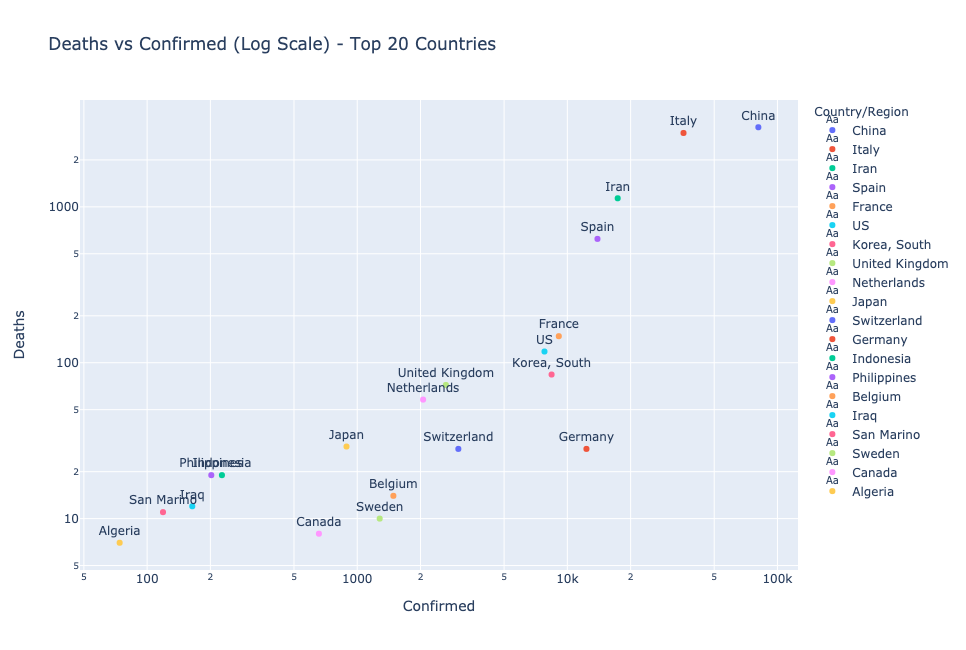

In [334]:
current = df[df.Date == df.Date.max()].reset_index(drop=True)
fig = px.scatter(current.sort_values('Deaths', ascending=False).iloc[:20, :], 
                 x='Confirmed', y='Deaths', color='Country/Region', height=650,
                 text='Country/Region', log_x=True, log_y=True, 
                 title='Deaths vs Confirmed (Log Scale) - Top 20 Countries')
fig.update_traces(textposition='top center')
fig.show()

## Flourish

In [198]:
df.to_csv('data/flourish.csv')

In [200]:
fl = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

In [204]:
fl.groupby(['Country/Region'], as_index=False).sum().to_csv("data/flourish.csv")

In [ ]:
pop = pd.read_pickle("data/pop/pop.pkl")

In [259]:
df = preprocessing.get_data(date_="03-15-2020", time_series=True, population=True)

In [260]:
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Country,Active,Population,ISO3_Code,Income,Confirmed_per_Cap,Deaths_per_Cap,Recovered_per_Cap,Active_per_Cap
0,Afghanistan,2020-01-22,0,0,0,Afghanistan,0,38.928341,AFG,Low-income countries,0.0,0.0,0.0,0.0
1,Albania,2020-01-22,0,0,0,Albania,0,2.877800,ALB,Upper-middle-income countries,0.0,0.0,0.0,0.0
2,Algeria,2020-01-22,0,0,0,Algeria,0,43.851043,DZA,Upper-middle-income countries,0.0,0.0,0.0,0.0
3,Andorra,2020-01-22,0,0,0,Andorra,0,0.077265,AND,High-income countries,0.0,0.0,0.0,0.0
4,Antigua and Barbuda,2020-01-22,0,0,0,Antigua and Barbuda,0,0.097928,ATG,High-income countries,0.0,0.0,0.0,0.0


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8580 entries, 0 to 8579
Data columns (total 14 columns):
Country/Region       8580 non-null object
Date                 8580 non-null datetime64[ns]
Confirmed            8580 non-null int64
Deaths               8580 non-null int64
Recovered            8580 non-null int64
Country              8580 non-null object
Active               8580 non-null int64
Population           8195 non-null float64
ISO3_Code            8195 non-null object
Income               8195 non-null object
Confirmed_per_Cap    8195 non-null float64
Deaths_per_Cap       8195 non-null float64
Recovered_per_Cap    8195 non-null float64
Active_per_Cap       8195 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(4)
memory usage: 1005.5+ KB


In [239]:
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime('%d-%m-%Y')
df = df.sort_values('Date')

In [240]:
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Country,Active,Population,ISO3_Code,Income,Confirmed_per_Cap,Deaths_per_Cap,Recovered_per_Cap,Active_per_Cap
1637,Kazakhstan,01-02-2020,0,0,0,Kazakhstan,0,18.776707,KAZ,Upper-middle-income countries,0.0,0.0,0.0,0.0
1561,Albania,01-02-2020,0,0,0,Albania,0,2.877800,ALB,Upper-middle-income countries,0.0,0.0,0.0,0.0
1562,Algeria,01-02-2020,0,0,0,Algeria,0,43.851043,DZA,Upper-middle-income countries,0.0,0.0,0.0,0.0
1563,Andorra,01-02-2020,0,0,0,Andorra,0,0.077265,AND,High-income countries,0.0,0.0,0.0,0.0
1564,Antigua and Barbuda,01-02-2020,0,0,0,Antigua and Barbuda,0,0.097928,ATG,High-income countries,0.0,0.0,0.0,0.0


In [263]:
df.pivot(index='Country/Region', columns='Date', values="Active_per_Cap").head()

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025688,0.102753,0.102753,0.128441,0.179818,0.179818,0.179818,0.282570,0.411012,0.513765
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.694975,3.474877,3.822364,7.644729,11.119605,12.857044,14.246994,17.374383
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.387676,0.433285,0.456089,0.456089,0.456089,0.342067,0.364872,0.501698,0.729743,0.866570
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.942471,12.942471,12.942471,12.942471,12.942471,0.000000,12.942471,0.000000,0.000000,12.942471
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.211584,10.211584,10.211584,10.211584


In [219]:
df.pivot(index='Country/Region', columns='Date', values="Active_per_Cap").to_csv("data/flourish2.csv")

In [ ]:
df.Date